In [ ]:
# !pip install openpyxl

In [2]:
import numpy as np
import pandas as pd
year = 1977
rd_actual = pd.read_excel('rdindex' + str(year) + '.xlsx')

if year == 1977:
    rd_actual = rd_actual.dropna(axis=0)
    rd_actual['RD no.'] = pd.to_numeric(rd_actual['RD no.'].astype(str).str.split('.').str[0], errors='coerce').astype(float).astype('Int64')
    rd_actual['rdid'] = rd_actual['RD no.'].astype(str).str[:3] + '0' + rd_actual['RD no.'].astype(str).str[3:]
    rd_actual['rdid'] = rd_actual['rdid'].astype(int)
else:
    rd_actual['rdid'] = rd_actual['RD no.'].astype(str).apply(lambda x: x[:3] + '0' + x[3:]).astype(int)

column_length = rd_actual['CPC code'].astype(str).str.len()
print("CPC code length", set(column_length))

rd_actual.tail(2)
# rd.rename(columns={'year': 'Year', 'Predicted_Label': 'cpc_class'}, inplace=True)

CPC code length {4}


,CPC code,RD no.,rdid
996,H05K,15642,156042
997,H05K,15882,158082


In [3]:
years = [1977, 1976, 1973, 1974, 1972]
rd = pd.read_csv('rd_prediction_bert-base-uncased_32_batch_size_alpha_10.csv', usecols=['rdid', 'year', 'Predicted_Label'])
rd = rd[rd['year'].isin(years)]
rd.head(2)


,rdid,year,Predicted_Label
840,9303,1972,G08
842,9305,1972,G03


In [4]:
rd

,rdid,year,Predicted_Label
840,9303,1972,G08
842,9305,1972,G03
843,9306,1972,G03
844,9307,1972,G03
845,9308,1972,G03
...,...,...,...
48802,162055,1977,G03
48803,162054,1977,G03
48846,156014,1977,G03
48886,154022,1977,C23


In [5]:
import numpy as np
import pandas as pd

# List of years
# years = [1977, 1976, 1973, 1974, 1972]  # Add more years as needed

# Create an empty list to store the DataFrames
dfs = []

# Read and process data for each year
for year in years:
    filename = 'rdindex' + str(year) + '.xlsx'
    
    if year == 1977:
        rd_actual = pd.read_excel(filename)
        rd_actual = rd_actual.dropna(axis=0)
        rd_actual['RD no.'] = pd.to_numeric(rd_actual['RD no.'].astype(str).str.split('.').str[0], errors='coerce').astype(float).astype('Int64')
        rd_actual['rdid'] = rd_actual['RD no.'].astype(str).str[:3] + '0' + rd_actual['RD no.'].astype(str).str[3:]
        rd_actual['rdid'] = rd_actual['rdid'].astype(int)
        # display(rd_actual['rdid'])
    elif year == 1976:
        rd_actual = pd.read_excel(filename)
        rd_actual['rdid'] = rd_actual['RD no.'].astype(str).apply(lambda x: x[:3] + '0' + x[3:]).astype(int)
        # display(rd_actual)
    
    elif((year == 1973) or (year == 1974)):
        filename = str(year) + '_RD - Sheet1.csv'
        rd_actual = pd.read_csv(filename)
        rd_actual['CPC code'] = rd_actual['CPC Class'].astype(str)
        rd_actual['rdid'] = rd_actual['RD No'].astype(str).apply(lambda x: x[:3] + '0' + x[3:]).astype(int)
        
    elif(year == 1972):
        filename = str(year) + '_RD - Sheet1.csv'
        rd_actual = pd.read_csv(filename)
        rd_actual['CPC code'] = rd_actual['CPC Class'].astype(str)
        rd_actual['rdid'] = rd_actual['RD No'].astype(str).apply(lambda x: x[:3] + x[3:]).astype(int)
        # display(rd_actual['rdid'])
        # display(rd_actual)
    dfs.append(rd_actual)

# Concatenate the DataFrames into a single DataFrame
rd_actual = pd.concat(dfs)

# Print CPC code length
column_length = rd_actual['CPC code'].astype(str).str.len()
print("CPC code length:", set(column_length))

rd_actual = rd_actual[['CPC code', 'rdid']]
rd_actual.reset_index(drop = True, inplace = True)
# Print the tail of the merged DataFrame
display(rd_actual)


CPC code length: {4}


,CPC code,rdid
0,A01F,155002
1,A01K,155018
2,A01N,153010
3,A01N,153023
4,A01N,153034
...,...,...
3831,H05b,9709
3832,H05b,9715
3833,H05k,9701
3834,H05k,9812


In [8]:
# #for 2 cpc code length
# # Merge the 'cpc' column from rd_actual to rd based on 'rdid'
# merged_df = rd.merge(rd_actual[['rdid', 'CPC code']], on='rdid', how='left')
# display(merged_df)
# # print(merged_df.year.value_counts())
# merged_df = merged_df.dropna(axis=0)
# merged_df = merged_df.reset_index(drop=True)
# merged_df['cpc_actual'] = merged_df['CPC code'].str[:-2]
# merged_df['Predicted_Label'] = merged_df['Predicted_Label'].str[:-1]
# merged_df_non_null = merged_df.dropna(subset=['cpc_actual'])
# # Remove the brackets ( ) around the text in 'cpc_actual' column
# merged_df_non_null['cpc_actual'] = merged_df_non_null['cpc_actual'].str.replace(r"\(|\)", "")
# merged_df_non_null = merged_df_non_null[merged_df_non_null['cpc_actual'].str.len() == 2]
# # merged_df_non_null
# # pd.set_option('display.max_rows', None)
# # merged_df_non_null[["rdid", "Predicted_Label", "cpc_actual", "year"]]

In [9]:
#For 3 cpc code length
# Merge the 'cpc' column from rd_actual to rd based on 'rdid'
merged_df = rd.merge(rd_actual[['rdid', 'CPC code']], on='rdid', how='left')
display(merged_df)
# print(merged_df.year.value_counts())
merged_df = merged_df.dropna(axis=0)
merged_df = merged_df.reset_index(drop=True)
merged_df['cpc_actual'] = merged_df['CPC code'].str[:-1]
merged_df_non_null = merged_df.dropna(subset=['cpc_actual'])
# Remove the brackets ( ) around the text in 'cpc_actual' column
merged_df_non_null['cpc_actual'] = merged_df_non_null['cpc_actual'].str.replace(r"\(|\)", "")
merged_df_non_null = merged_df_non_null[merged_df_non_null['cpc_actual'].str.len() == 3]
# merged_df_non_null
# pd.set_option('display.max_rows', None)
# merged_df_non_null[["rdid", "Predicted_Label", "cpc_actual", "year"]]

,rdid,year,Predicted_Label,CPC code
0,9303,1972,G08,B62d
1,9305,1972,G03,G03g
2,9306,1972,G03,G03c
3,9306,1972,G03,G03d
4,9307,1972,G03,G03d
...,...,...,...,...
3814,162054,1977,G03,G03B
3815,156014,1977,G03,G03D
3816,156014,1977,G03,G03G
3817,154022,1977,C23,H01I


/scratch/slurm_tmpdir/job_22444253/ipykernel_46588/3024843879.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_df_non_null['cpc_actual'] = merged_df_non_null['cpc_actual'].str.replace(r"\(|\)", "")


In [10]:
merged_df_non_null

,rdid,year,Predicted_Label,CPC code,cpc_actual
0,9303,1972,G08,B62d,B62
1,9305,1972,G03,G03g,G03
2,9306,1972,G03,G03c,G03
3,9306,1972,G03,G03d,G03
4,9307,1972,G03,G03d,G03
...,...,...,...,...,...
3480,162054,1977,G03,G03B,G03
3481,156014,1977,G03,G03D,G03
3482,156014,1977,G03,G03G,G03
3483,154022,1977,C23,H01I,H01


In [11]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have the merged_df_non_null DataFrame

# Extract the predicted label and actual values columns
y_pred = merged_df_non_null['Predicted_Label']
y_actual = merged_df_non_null['cpc_actual']

# Calculate accuracy
accuracy = accuracy_score(y_actual, y_pred)

# Calculate precision
precision = precision_score(y_actual, y_pred, average='macro')

# Calculate recall
recall = recall_score(y_actual, y_pred, average='macro')

# Calculate F1-score
f1 = f1_score(y_actual, y_pred, average='macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.5962697274031564
Precision: 0.32788287557881285
Recall: 0.44204330246401086
F1-score: 0.33784249380345294


/opt/bwhpc/common/jupyter/tensorflow/2023-03-24/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/bwhpc/common/jupyter/tensorflow/2023-03-24/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


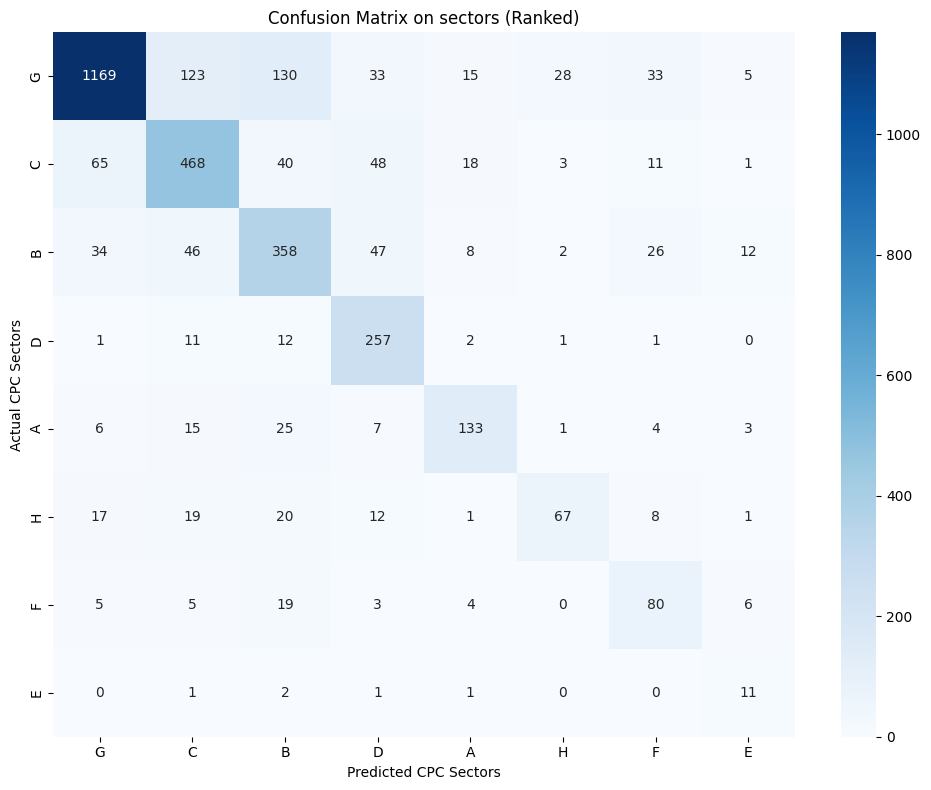

In [16]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have the merged_df_non_null DataFrame

# Extract the predicted label and actual values columns
y_pred = merged_df_non_null['Predicted_Label']
y_actual = merged_df_non_null['cpc_actual']

# Extract the first letter from the CPC classes
y_pred_first_letter = y_pred.apply(lambda x: x[0])
y_actual_first_letter = y_actual.apply(lambda x: x[0])

# Get the unique first letters from both labels
unique_classes = sorted(set(y_actual_first_letter) | set(y_pred_first_letter))

# Create a confusion matrix
cm = confusion_matrix(y_actual_first_letter, y_pred_first_letter, labels=unique_classes)

# Convert the confusion matrix to a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=unique_classes, columns=unique_classes)

# Sort the DataFrame by overall performance (you can choose any performance metric, e.g., accuracy, precision, recall, etc.)
# Here, we'll sort by accuracy (sum of true positives on the diagonal) in descending order
sum_by_class = cm_df.sum(axis=1)
sorted_classes = sum_by_class.sort_values(ascending=False).index
cm_df_sorted = cm_df.loc[sorted_classes, sorted_classes]

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df_sorted, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted CPC Sectors')
plt.ylabel('Actual CPC Sectors')
plt.title('Confusion Matrix on sectors (Ranked)')
plt.tight_layout()
# Save the figure in EPS format with width of 20 cm and no extra spaces
plt.savefig('confusion_matrix_ranked_1.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()


In [20]:
import pandas as pd

def class_wise_accuracy(confusion_matrix_df):
    class_wise_accuracy_dict = {}
    for class_label in confusion_matrix_df.index:
        true_positives = confusion_matrix_df.loc[class_label, class_label]
        false_negatives = confusion_matrix_df.loc[class_label, :].sum() - true_positives
        class_accuracy = true_positives / (true_positives + false_negatives)
        class_wise_accuracy_dict[class_label] = class_accuracy

    return class_wise_accuracy_dict

# Assuming that the confusion matrix is stored in a pandas DataFrame called cm_df_sorted
# You can sort the DataFrame to make it easier to interpret the results
cm_df_sorted = cm_df_sorted.sort_index(axis=0).sort_index(axis=1)

# Calculate class-wise accuracy using the function
class_wise_acc = class_wise_accuracy(cm_df_sorted)

# Print the class-wise accuracy
print("Class-wise Accuracy:")
for class_label, accuracy in class_wise_acc.items():
    print(f"Sector {class_label}: {accuracy:.4f}")


Class-wise Accuracy:
Sector A: 0.6856
Sector B: 0.6717
Sector C: 0.7156
Sector D: 0.9018
Sector E: 0.6875
Sector F: 0.6557
Sector G: 0.7611
Sector H: 0.4621


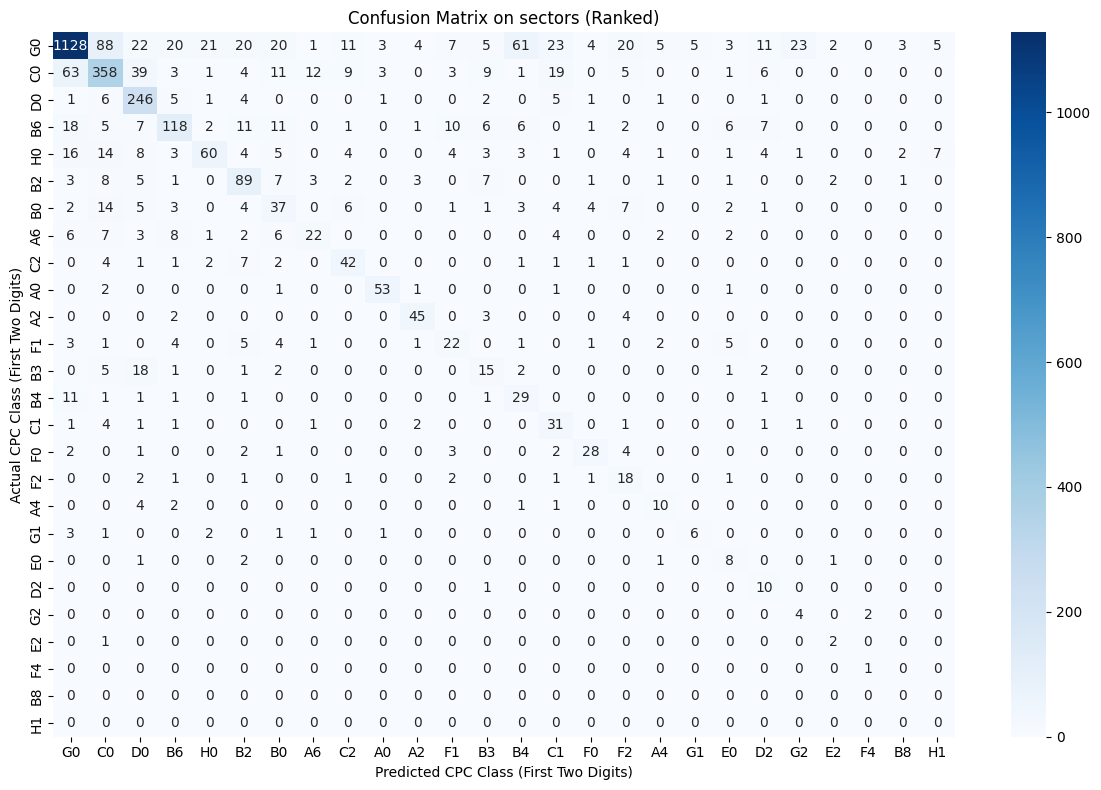

In [15]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have the merged_df_non_null DataFrame

# Extract the predicted label and actual values columns
y_pred = merged_df_non_null['Predicted_Label']
y_actual = merged_df_non_null['cpc_actual']

# Extract the first letter from the CPC classes
y_pred_first_letter = y_pred.apply(lambda x: x[0:2])
y_actual_first_letter = y_actual.apply(lambda x: x[0:2])

# Get the unique first letters from both labels
unique_classes = sorted(set(y_actual_first_letter) | set(y_pred_first_letter))

# Create a confusion matrix
cm = confusion_matrix(y_actual_first_letter, y_pred_first_letter, labels=unique_classes)

# Convert the confusion matrix to a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=unique_classes, columns=unique_classes)

# Sort the DataFrame by overall performance (you can choose any performance metric, e.g., accuracy, precision, recall, etc.)
# Here, we'll sort by accuracy (sum of true positives on the diagonal) in descending order
sum_by_class = cm_df.sum(axis=1)
sorted_classes = sum_by_class.sort_values(ascending=False).index
cm_df_sorted = cm_df.loc[sorted_classes, sorted_classes]

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(cm_df_sorted, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted CPC Class (First Two Digits)')
plt.ylabel('Actual CPC Class (First Two Digits)')
plt.title('Confusion Matrix on sectors (Ranked)')
plt.tight_layout()
# Save the figure in EPS format with width of 20 cm and no extra spaces
plt.savefig('confusion_matrix_ranked_2.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
print(cm_df)

In [92]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have the merged_df_non_null DataFrame

# Extract the predicted label and actual values columns
y_pred = merged_df_non_null['Predicted_Label'].str[0]
y_actual = merged_df_non_null['cpc_actual'].str[0]

# Calculate accuracy
accuracy = accuracy_score(y_actual, y_pred)

# Calculate precision
precision = precision_score(y_actual, y_pred, average='macro')

# Calculate recall
recall = recall_score(y_actual, y_pred, average='macro')

# Calculate F1-score
f1 = f1_score(y_actual, y_pred, average='macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.7296987087517934
Precision: 0.6203356394751979
Recall: 0.6926202373673801
F1-score: 0.6380531009861801
